## Bibliotecas necessárias

In [32]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point

## Base de dados

In [33]:
#Definindo os diretórios para ler e salvar arquivos
path_jundiai = 'D:/projetos_qswatmod/jundiai/outputs/'
path_resultados = 'D:/projetos_qswatmod/jundiai/resultados/'

In [34]:
#Lendo a camada de carga hidráulica (.geojson) da bacia do rio Jundiaí
head = gpd.read_file(path_jundiai + 'mf_hd_monthly.geojson')

In [35]:
#Lendo a camada de limites (.geojson) da bacia do rio Jundiaí
limites_jundiai = gpd.read_file(path_jundiai + 'boundary.geojson')

In [36]:
#Visualizando as cinco primeira linhas
head.head()

,fid,VALUE,grid_id,elev_count,elev_sum,elev_mf,row,col,Jan-1980,Feb-1980,...,Apr-2020,May-2020,Jun-2020,Jul-2020,Aug-2020,Sep-2020,Oct-2020,Nov-2020,Dec-2020,geometry
0,1.0,0.0,1,0.0,0.0,NaN,1,1,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,"MULTIPOLYGON (((265348.769 7448256.657, 265348..."
1,2.0,0.0,2,0.0,0.0,NaN,1,2,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,"MULTIPOLYGON (((265598.769 7448256.657, 265598..."
2,3.0,0.0,3,0.0,0.0,NaN,1,3,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,"MULTIPOLYGON (((265848.769 7448256.657, 265848..."
3,4.0,0.0,4,0.0,0.0,NaN,1,4,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,"MULTIPOLYGON (((266098.769 7448256.657, 266098..."
4,5.0,0.0,5,0.0,0.0,NaN,1,5,-999.99,-999.99,...,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,-999.99,"MULTIPOLYGON (((266348.769 7448256.657, 266348..."


## Processamento dos dados

In [37]:
#Dimensões do gdf antes do recorte
l, c = head.shape

print(f'O gdf (completo) tem {l} linhas e {c} colunas')

O gdf (completo) tem 33174 linhas e 501 colunas


In [38]:
#Recortando a camada de carga hidráulica a partir dos limites da bacia
head = gpd.clip(head, limites_jundiai, keep_geom_type=True)

In [39]:
#Dimensões do gdf recortado
l, c = head.shape

print(f'O gdf (camada recortada) tem {l} linhas e {c} colunas')

O gdf (camada recortada) tem 18591 linhas e 501 colunas


In [40]:
#Calculando a carga hidráulica média a partir de um ano selecionado
head_media = head.copy(deep=True)

ano_selec = '2020'

head_media = head_media.loc[:, 'Jan-' + ano_selec: 'Dec-' + ano_selec]
head_media['media'] = head_media.mean(axis=1)
head_media = head_media[['media']]

head = pd.concat([head, head_media], axis=1)

head.head()

,fid,VALUE,grid_id,elev_count,elev_sum,elev_mf,row,col,Jan-1980,Feb-1980,...,May-2020,Jun-2020,Jul-2020,Aug-2020,Sep-2020,Oct-2020,Nov-2020,Dec-2020,geometry,media
28219,28220.0,0.0,28220,13.0,13405.0,1031.153846,97,284,1027.55,1026.21,...,1846.68,1834.94,1821.31,1805.67,1789.51,1771.40,1753.33,1747.75,"POLYGON ((336348.769 7424506.657, 336348.769 7...",1809.858333
28218,28219.0,0.0,28219,4.0,4029.0,1007.250000,97,283,1006.40,1016.68,...,1846.39,1834.63,1820.98,1805.32,1789.11,1771.00,1752.96,1747.47,"POLYGON ((336028.769 7424506.657, 336028.769 7...",1809.555833
28222,28223.0,0.0,28223,50.0,55554.0,1111.080000,97,287,1104.50,1098.13,...,1847.61,1835.91,1822.36,1806.77,1790.73,1772.66,1754.50,1748.53,"POLYGON ((336848.769 7424506.657, 337098.769 7...",1810.807500
28223,28224.0,0.0,28224,13.0,14635.0,1125.769231,97,288,1118.92,1111.42,...,1847.72,1836.03,1822.49,1806.92,1790.90,1772.83,1754.67,1748.61,"POLYGON ((337098.769 7424506.657, 337228.769 7...",1810.904167
28220,28221.0,0.0,28221,49.0,50797.0,1036.673469,97,285,1037.29,1041.35,...,1847.04,1835.32,1821.72,1806.09,1789.98,1771.89,1753.78,1748.07,"POLYGON ((336348.769 7424506.657, 336598.769 7...",1810.235833


In [41]:
#Conferindo se o resultado é um geodataframe do Geopandas
print(f'A camada vetorial MODFLOW é um {type(head)}')

A camada vetorial MODFLOW é um <class 'geopandas.geodataframe.GeoDataFrame'>


In [42]:
#Alterando o src das camadas para SIRGAS 2000
head = head.to_crs(epsg='4674')
limites_jundiai = limites_jundiai.to_crs(epsg='4674')

## Mapa de carga hidráulica da bacia do rio Jundiaí

#### Escala cartográfica

In [43]:
#Calculando a distância entre dois pontos de longitude diferentes para criar a escala cartográfica

points = gpd.GeoSeries([Point(-47.5, -22.8), Point(-46.5, -22.8)], crs=4674)    #  --> Geographic WGS 84 - degrees
points = points.to_crs(32723)    #  --> Projected WGS 84 - meters

distance_meters = points[0].distance(points[1])
print(f'Distância:\n\n{round(distance_meters, 2)} m\nou\n{round(distance_meters / 1000, 2)} km')

Distância:

102686.27 m
ou
102.69 km


#### Mapa

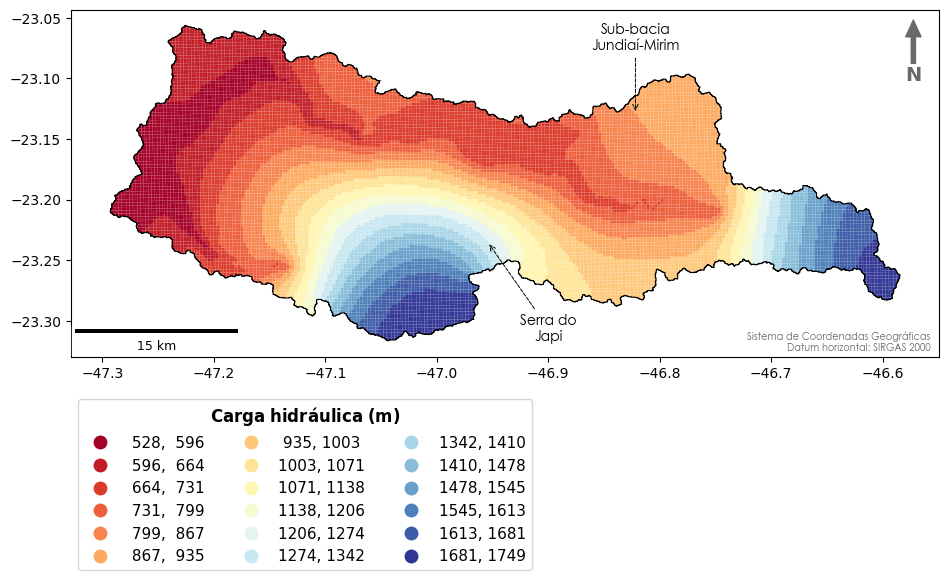

In [44]:
#Configurando a página
cm = 1/2.54   # --> de polegadas para centímetros
fig, ax = plt.subplots(figsize=(25*cm, 15*cm), layout='tight')    # layout='constrained'

# Esquema de classificação de classes de recarga     --> 'YlGn'
scheme = 'equal_interval'    # 'natural_breaks'    'equal_interval'
coluna_resultado = 'Dec-2020'    # 'media'   Dec-2020

######################################################################
#Plot 01
head.plot(ax=ax, column=coluna_resultado, cmap='RdYlBu', scheme=scheme, k=18, legend=True, legend_kwds={'title': '$\\bf{Carga _ hidráulica _ (m)}$',
                                                                                                        'title_fontsize': 12,
                                                                                                        'ncols': 3,
                                                                                                        'loc': 'upper left',
                                                                                                        'bbox_to_anchor': (0.0, -0.1),
                                                                                                        'fontsize': 11,
                                                                                                        'fmt': '{:.0f}',
                                                                                                        'frameon': True
                                                                                                        }, zorder=1)

#Plotando os limites da bacia
limites_jundiai.boundary.plot(ax=ax, color='k', lw=0.8, zorder=2, label='Limites')


#Seta do Norte
x, y, arrow_length = 0.97, 0.97, 0.16
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='dimgray', edgecolor='dimgray', width=3, headwidth=11),
            ha='center', va='center', fontsize=14, color='dimgray', weight='bold',
            xycoords=ax.transAxes)


#Escala cartográfica
scalebar = ScaleBar(distance_meters, location='lower left', font_properties={'size': 9})
ax.add_artist(scalebar)


#Textos no mapa
plt.text(0.99, 0.01, 'Sistema de Coordenadas Geográficas\nDatum horizontal: SIRGAS 2000', transform=ax.transAxes, va='bottom', ha='right', color='k', fontsize=7, fontweight='light', fontname='Century Gothic', alpha=0.6)


#Anotações no mapa
arrowprops = dict(arrowstyle='->', color='k', lw=0.7, ls='--')
color, size, fontweight, fontname, alpha = 'k', 10, 'light', 'Century Gothic', 1.0

ax.annotate(text='Sub-bacia\nJundiaí-Mirim', xy=(0.65, 0.7), xytext=(0.65, 0.92), xycoords=ax.transAxes, color=color, size=size, fontweight=fontweight, fontname=fontname, alpha=alpha, va='center', ha='center', arrowprops=arrowprops)
ax.annotate(text='Serra do\nJapi', xy=(0.48, 0.33), xytext=(0.55, 0.08), xycoords=ax.transAxes, color=color, size=size, fontweight=fontweight, fontname=fontname, alpha=alpha, va='center', ha='center', arrowprops=arrowprops)


#Salvando o mapa
plt.savefig(path_resultados + 'mapa_head_modflow.png', facecolor='w', bbox_inches='tight', dpi=300)

#Visualizando o mapa
plt.show()